In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install --upgrade gradio

In [ ]:
df=pd.read_csv("./placement.csv")

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


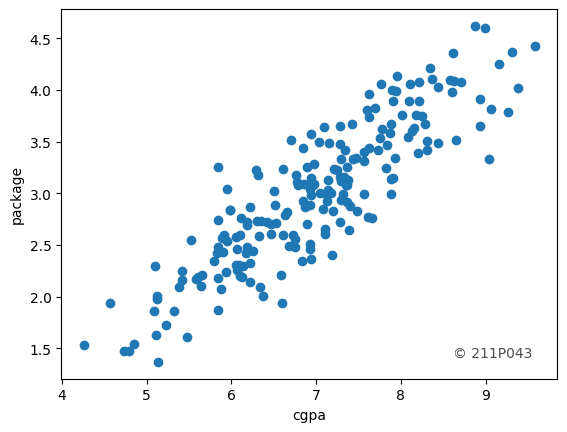

In [ ]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("cgpa")
plt.ylabel("package")
plt.text(0.95, 0.05, '© 211P043', ha='right', va='bottom', fontsize=10, color='black', alpha=0.7, transform=plt.gca().transAxes)
plt.show()

In [ ]:
x,y=df.iloc[:,0:1],df.iloc[:,-1]
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [ ]:
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [ ]:
y_test

,package
95,2.79
15,3.23
30,3.26
158,3.04
128,3.34
115,4.21
69,2.94
170,2.87
174,2.99
45,3.58


In [ ]:
lr.predict(x_test)

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

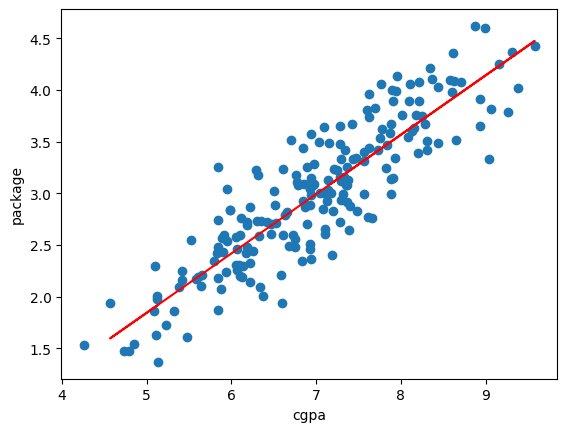

In [ ]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_train,lr.predict(x_train),color="r")
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()

In [ ]:
m=lr.coef_
b=lr.intercept_

In [ ]:
m*6.63 + b

array([2.78031348])

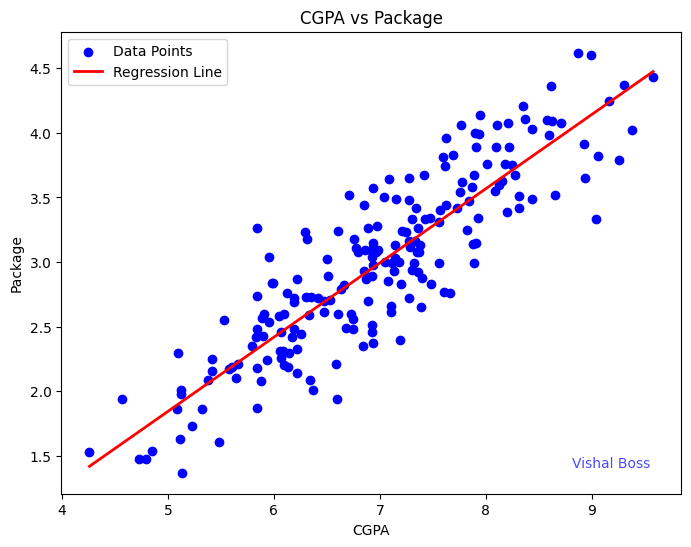

'Predicted Package for CGPA 6.63: 2.78'

In [ ]:
def plot_and_predict(cgpa):
    plt.figure(figsize=(8, 6))
    plt.scatter(df["cgpa"], df["package"], color='blue', label='Data Points')

    # Plot the regression line
    x_values = np.linspace(df["cgpa"].min(), df["cgpa"].max(), 100).reshape(-1, 1)
    y_values = lr.predict(x_values)
    plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression Line')

    # Show the text
    plt.text(0.95, 0.05, 'Vishal Boss', ha='right', va='bottom', fontsize=10, color='blue', alpha=0.7, transform=plt.gca().transAxes)

    plt.xlabel("CGPA")
    plt.ylabel("Package")
    plt.legend()
    plt.title("CGPA vs Package")

    # Show the plot
    plt.show()
    # Predict the package for the given CGPA
    try:
        cgpa = float(cgpa)
        prediction = lr.predict(np.array([[cgpa]]))[0]
        return f"Predicted Package for CGPA {cgpa:.2f}: {prediction:.2f}"
    except ValueError:
        return "Invalid input. Please enter a valid number."
plot_and_predict(6.63)